<img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> 
<div style="font-size: 45px"> Data Science 2: Advanced Topics in Data Science</div>

## Classification of Human Facial Expressions

**Harvard University**  
**Spring 2025**  
<strong>Members:</strong><div style="margin-left: 20px; margin-top: -15px; font-size: 95%">
    Santiago Becerra – <a href="mailto:sab1475@g.harvard.edu">sab1475@g.harvard.edu</a><br>
    Chlose Seo – <a href="mailto:yes593@g.harvard.edu">yes593@g.harvard.edu</a><br>
    Kaylee Vo – <a href="mailto:kav418@g.harvard.edu">kav418@g.harvard.edu</a><br>
    Jie Zhao – <a href="mailto:jiz273@g.harvard.edu">jiz273@g.harvard.edu</a><br>
    Sarah Kim - <a href="mailto:gak604@g.harvard.edu">gak604@g.harvard.edu</a>
</div>

<hr style="height:10pt">

<style>
.toc-tight {
    font-size: 95%;
    margin-top: -10px;
    margin-left: 0;
    padding-left: 0;
}
.toc-tight ul {
    padding-left: 20px;
    margin-left: 0;
}
.toc-tight ul ul {
    padding-left: 25px;        /* deeper indent for 3rd level */
    font-size: 90%;            /* smaller font for 3rd level */
}
.toc-tight li {
    list-style-type: none;
    margin-top: 5px;
    margin-bottom: 5px;
    padding-left: 0;
}
</style>

## Table of Contents
<ul class="toc-tight">
  <li><a href="#introduction">1. Introduction</a>
    <ul>
      <li><a href="#refined-problem-statement">1.1 Problem Statement</a></li>
      <li><a href="#EDA-significance">1.2 Significance of EDA Insights</a></li>
    </ul>
  </li>
  <li><a href="#EDA-review">2. Comprehensive EDA Review</a>
    <ul>
      <li><a href="#data-description">2.1 Data Description</a>
        <ul>
          <li><a href="#data-description-access">2.1.1 Access</a></li>
          <li><a href="#data-description-load">2.1.2 Load</a></li>
          <li><a href="#data-description-understand">2.1.3 Understand</a></li>
        </ul>
      </li>
      <li><a href="#data-summary">2.2 Data Summary</a></li>
      <li><a href="#data-anaylsis">2.3 Data Analysis</a>
        <ul>
           <li><a href="#missing-data">3.1 Missing Data</a></li>
           <li><a href="#data-imbalance">3.2 Data Imbalance</a></li>
           <li><a href="#denoising">3.3 Denoising</a></li>
           <li><a href="#outlier-detection">3.4 Outlier Detection</a></li>
           <li><a href="#meaningful-insights">3.5 Meaningful Insights</a></li>
    </ul>
    </ul>
  </li>
  <li><a href="#research-question">4. Research Question</a></li>
  <li><a href="#baseline-model">5. Baseline Model</a></li>
  <li><a href="#visualizations">6. Visualizations</a>
    <ul>
      <li><a href="#activation-maximization">6.1 Activation Maximization</a></li>
      <li><a href="#gradcam">6.2 GradCAM</a></li>
    </ul>
  </li>
  <li><a href="#sources">7. Sources</a></li>
  <li><a href="#appendix">8. Appendix</a></li>
</ul>


## 1. Introduction
<div style="margin-top: -10px; font-size: 95%; text-align: left;">

This project focuses on developing a deep learning model to automatically classify human facial expressions using the FER-2013 dataset. Accurate emotion recognition has broad applications in human-computer interaction, mental health monitoring, and affective computing. The goal is to build a robust model that performs well despite challenges such as image artifacts, class imbalance, and subtle emotional variations.

</div>

### 1.1 Problem Statement
<div style="margin-top: -10px; font-size: 95%; text-align: left;">

Originally, the objective was to train a CNN to recognize seven facial-expression classes from 48×48 grayscale images. However, exploratory data analysis revealed two key challenges:

**1. Image Artifacts**<br>
Approximately 15% of samples contain watermarks, compression artifacts, or uneven noise.

**2. Class Imbalance**<br>
Less frequent emotions such as “disgust” and “fear” make up less than 5% of the dataset, while “happy” and “neutral” are heavily overrepresented.

Therefore, our refined objective is to <u>*design and evaluate a CNN-based emotion recognition system that is robust to image artifacts and class imbalance by incorporating targeted denoising, outlier detection, and data augmentation strategies*</u>.

### 1.2 Significance of EDA Insights
<div style="margin-top: -10px; font-size: 95%; text-align: left;">

The exploratory data analysis (EDA) fundamentally reshaped our approach, highlighting specific data quality and distribution issues that required targeted solutions. As mentioned earlier, EDA revealed significant image artifacts and class imbalance, which prompted the following methodological shifts:

**Non-local means denoising** was introduced to effectively reduce artifacts while preserving critical facial features, directly addressing the noise patterns uncovered during EDA.

**Outlier detection** using an autoencoder was implemented to systematically identify and remove approximately 2% of the noisiest or least informative images, reducing variance and improving overall data quality.

**Class weighting and targeted augmentation** strategies were incorporated to mitigate the severe class imbalance, ensuring the model could learn from under-represented emotions as effectively as from the majority classes.

By directly linking each preprocessing step to specific EDA findings, our workflow became both transparent and reproducible.

## 2. Comprehensive EDA Review

### 2.1 Data Description
<div style="margin-top: -10px; font-size: 95%; text-align: left;">

To prepare the FER-2013 dataset for modeling, we followed a structured process involving data retrieval, loading, and initial exploration to ensure quality and usability.

**Access:** The FER-2013 dataset was retrieved via KaggleHub and stored in a structured local directory to accommodate its size, which exceeded typical repository limits.

**Load:** Images were loaded using Keras’s `image_dataset_from_directory` and `ImageDataGenerator`, applying an 80/20 train-validation split to support model development and tuning.

**Understand:** Random subsets of images were sampled to generate pixel-value histograms and class-frequency charts. This early exploration helped identify image artifacts, corrupted samples, and significant class imbalance prior to modeling.

#### 2.1.1 Access
<div style="margin-top: -10px; font-size: 95%; text-align: left;">

In this section, we import libraries and write code to automatically pull the data from the internet. The code fetches it from Kaggle and stores it in the user's cache, followed by code that moves the data from the cache to the project directory.

In [5]:
# We keep this for Kaylee because she uses custom GPU
# !chmod +x ./scripts/installation.sh
# !./scripts/installation.sh

In [1]:
import os
import pickle
import platform
import random
import shutil
import warnings
from pprint import pprint

import cv2
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras.utils import set_random_seed
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import (
    Activation,
    BatchNormalization,
    Concatenate,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    Input,
    MaxPooling2D,
    Multiply,
    RandomFlip,
    RandomRotation,
    RandomTranslation,
    RandomZoom,
    Rescaling,
    SpatialDropout2D,
    UpSampling2D,
)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import image_dataset_from_directory
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tqdm import tqdm

from utils.utils import output_clean_train, visualize_outliers

C:\Users\gkim5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Notebook parameters
DATA_DIR = os.getcwd() + "/data"
RANDOM_SEED = 109

In [4]:
# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")
print("Path to dataset files:", path)

100%|██████████| 60.3M/60.3M [00:01<00:00, 47.2MB/s]

Extracting files...


Path to dataset files: C:\Users\gkim5\.cache\kagglehub\datasets\msambare\fer2013\versions\1


In [5]:
# For mac users
if platform.system() == "Darwin":
    os.system('find . -name ".DS_Store" -delete')

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

In [6]:
# if data folder is empty, copy files from the dataset folder
if not os.listdir(DATA_DIR):
    for item in os.listdir(path):
        item_path = os.path.join(path, item)

        if os.path.isfile(item_path):
            shutil.copy(item_path, DATA_DIR)
            print(f"Copied file: {item_path}")
        elif os.path.isdir(item_path):
            shutil.copytree(item_path, os.path.join(DATA_DIR, item))
            print(f"Copied directory: {item_path}")

Copied directory: C:\Users\gkim5\.cache\kagglehub\datasets\msambare\fer2013\versions\1\test
Copied directory: C:\Users\gkim5\.cache\kagglehub\datasets\msambare\fer2013\versions\1\train


#### 2.1.2 Load
<div style="margin-top: -10px; font-size: 95%; text-align: left;">

The provided data has a directory structure, which we leverage to load the images. After applying a 20% validation split, we have **22,968 images** in the *training set*, **5,741** in the *validation set*, and **7,178** in the *test set*, totaling 35,887 images. The images are scaled by dividing pixel values by 255. Note, this scaling strategy is arbitrary for now and may be adjusted later.

In [7]:
train_dir = DATA_DIR + "/train"
val_dir = DATA_DIR + "/validation"
val_split = 0.2
random.seed(RANDOM_SEED)

if not os.path.exists(val_dir):
    os.makedirs(val_dir, exist_ok=True)
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        val_class_path = os.path.join(val_dir, class_name)
        os.makedirs(val_class_path, exist_ok=True)

        # List all images in the class directory
        images = os.listdir(class_path)
        random.shuffle(images)

        # Move a portion of images to validation
        num_val = int(len(images) * val_split)
        for img in images[:num_val]:
            shutil.move(
                os.path.join(class_path, img), os.path.join(val_class_path, img)
            )

In [8]:
datagen = ImageDataGenerator(rescale=1.0 / 255)

In [9]:
batch_size = 32
target_size = (48, 48)  # generator can resize all images if we want

traingen = datagen.flow_from_directory(
    DATA_DIR + "/train",  # this is the target directory
    target_size=target_size,
    batch_size=batch_size,
    class_mode="sparse",
    color_mode="grayscale",
)
valgen = datagen.flow_from_directory(
    DATA_DIR + "/validation",
    target_size=target_size,
    batch_size=batch_size,
    class_mode="sparse",
    color_mode="grayscale",
)

testgen = datagen.flow_from_directory(
    DATA_DIR + "/test",
    target_size=target_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode="sparse",
    color_mode="grayscale",
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
total_images = traingen.samples + valgen.samples + testgen.samples

print("Total images in dataset:", total_images)

Total images in dataset: 35887


#### 2.1.3 Understanding
<div style="margin-top: -10px; font-size: 95%; text-align: left;">

The batch size is set to 32, but this is an arbitrary value and may be changed. The image dimensions are 48×48 with a single channel (ex. grayscale images). There are 7 classes, corresponding to the 7 emotions. The mapping from integer to emotion is shown below. A set of 8 sample images is also presented to preview the data. The images generally align well with their labels. One aspect to note is the presence of watermarks in some images, which may introduce noise and will need to be addressed during preprocessing.

In [11]:
data_batch, labels_batch = next(traingen)
print("data batch shape:", data_batch.shape)
print("labels batch shape:", labels_batch.shape)

data batch shape: (32, 48, 48, 1)
labels batch shape: (32,)


In [12]:
class_indices = traingen.class_indices
class_labels = {v: k for k, v in class_indices.items()}

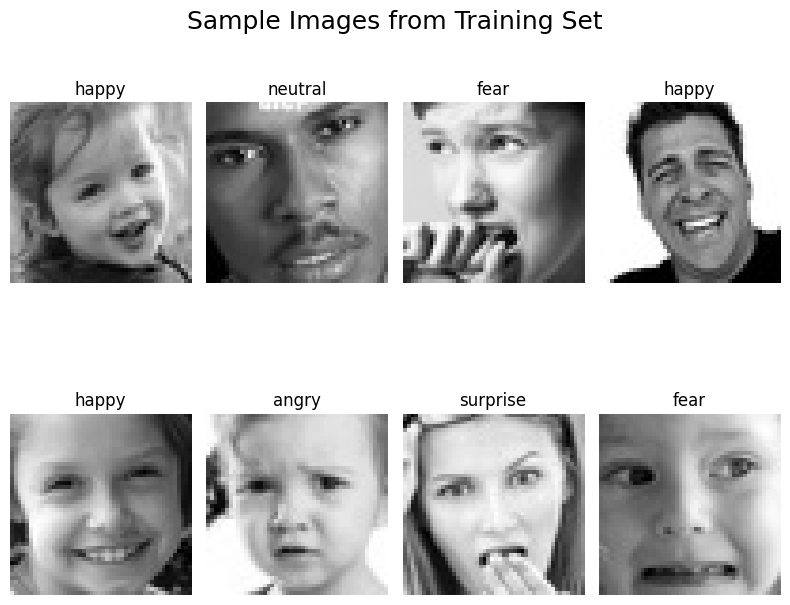

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(8, 8))

axs = ax.ravel()

counter = 0
for batch, labels in traingen:
    for img, label in zip(batch, labels):
        class_index = int(label)
        class_name = class_labels[class_index]

        axs[counter].imshow(img[:, :, 0], cmap="gray")
        axs[counter].set_title(class_name)
        axs[counter].axis("off")

        counter += 1
        if counter >= 8:
            break

    break

plt.suptitle("Sample Images from Training Set", y=0.9, fontsize=18)
plt.tight_layout()

<div style="margin-top: -10px; font-size: 75%; text-align: left;">
Figure 1. XXXXX

### 2.2 Data Summary
<div style="margin-top: -10px; font-size: 95%; text-align: left;">

As mentioned before, the dataset includes 35,887 images, each of which is a 48×48 grayscale facial image labeled with one of seven emotions: angry, disgust, fear, happy, neutral, sad, or surprise. The data is split into training (22,968 images), validation (5,741 images), and test (7,178 images) sets using an 80/20 split. This dataset is used to train a multi-class classification model that identifies human emotions based on facial images. 

To inspect the structure and scale of the training data, one batch was sampled from the training generator to display key statistics.

In [ ]:
data_batch, labels_batch = next(traingen)
print("Training Batch Summary Statistics")
print("=" * 40)
print("Shape of data batch:", data_batch.shape)
print("Class labels:", class_labels)

print("Pixel data summary:")
print(f"Dtype: {data_batch.dtype}")
print(f"Mean: {data_batch.mean():.2f}")
print(f"Std : {data_batch.std():.2f}")
print(f"Min : {data_batch.min()}")
print(f"Max : {data_batch.max()}")

Training Batch Summary Statistics
Shape of data batch: (32, 48, 48, 1)
Class labels: {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
Pixel data summary:
Dtype: float32
Mean: 0.50
Std : 0.26
Min : 0.0
Max : 1.0


<div style="margin-top: -10px; font-size: 95%; text-align: left;">
The pixel values have been normalized to the range [0.0, 1.0]. Summary statistics of the pixel values show a mean of 0.51, a standard deviation of 0.26, a minimum of 0.0, and a maximum of 1.0—indicating that the data is properly scaled and centered around mid-range values.

<div style="margin-top: -10px; font-size: 95%; text-align: left;">
The flowchart below shows the data pipeline architecture. We will adjust if we decide to make any future changes.

<div style="text-align: center;">
  <img src="img/flow_1.png" style="width: 70%;" />
</div>

### 2.3 Data Analysis
<div style="margin-top: -10px; font-size: 95%; text-align: left;">

#### 2.3.1 Missing Data
<div style="margin-top: -10px; font-size: 95%; text-align: left;">

The first part of our data analysis checks for missing data. We iterate through the train, validation, and test generators, checking for any missing pixel values by counting NaNs. The results show that there are no missing pixels in any of the three generators.

In [15]:
def count_missing_pixels(generator, name=""):
    generator.reset()
    missing_count = 0
    total_pixels = 0

    for _ in range(len(generator)):
        batch_images, _ = next(generator)
        missing_count += np.isnan(batch_images).sum()
        total_pixels += batch_images.size

    print(f"\n--{name} Set--")
    print(f"Missing pixel values: {missing_count}")
    print(f"Total pixels:         {total_pixels}")
    if total_pixels > 0:
        pct = (missing_count / total_pixels) * 100
        print(f"Percentage missing:   {pct:.2f}%")
    else:
        print("No pixels found")

    return missing_count


# Call the function for each generator
missing_train = count_missing_pixels(traingen, "Training")
missing_val = count_missing_pixels(valgen, "Validation")
missing_test = count_missing_pixels(testgen, "Test")

if missing_train + missing_val + missing_test == 0:
    print(
        "\nObservation: There are no missing pixel values in training, validation, or test sets."
    )
else:
    print("\nObservation: Some missing pixel values were found.")


--Training Set--
Missing pixel values: 0
Total pixels:         52918272
Percentage missing:   0.00%

--Validation Set--
Missing pixel values: 0
Total pixels:         13227264
Percentage missing:   0.00%

--Test Set--
Missing pixel values: 0
Total pixels:         16538112
Percentage missing:   0.00%

Observation: There are no missing pixel values in training, validation, or test sets.


#### 2.3.2 Data Imbalance
<div style="margin-top: -10px; font-size: 95%; text-align: left;">

We now move on to check for class imbalance. The results below show clear class imbalance in the training set:

- **Underrepresented**:
  - *Disgust* (fewer than 1,000 images)
  - *Surprise*
- **Overrepresented**:
  - *Happy* (nearly 6,000 images)

This imbalance can bias the model toward majority classes and reduce accuracy on minority ones like *disgust* and *surprise*. To improve robustness and generalization, we applied data augmentation (e.g., rotation, zoom, flipping) to the entire training set. While this doesn’t rebalance class frequency, it helps prevent overfitting and exposes the model to more varied inputs.

If this approach proves insufficient, we’ll explore more targeted strategies—such as oversampling underrepresented classes or applying heavier augmentation selectively.

Additionally, we computed `class_weight` values to be used during model training. These weights adjust the loss function to penalize misclassifications of rare classes more heavily. For example, *disgust* has a weight of **9.4**, while *happy* has a weight of **0.57**. This encourages the model to pay more attention to minority classes during learning.

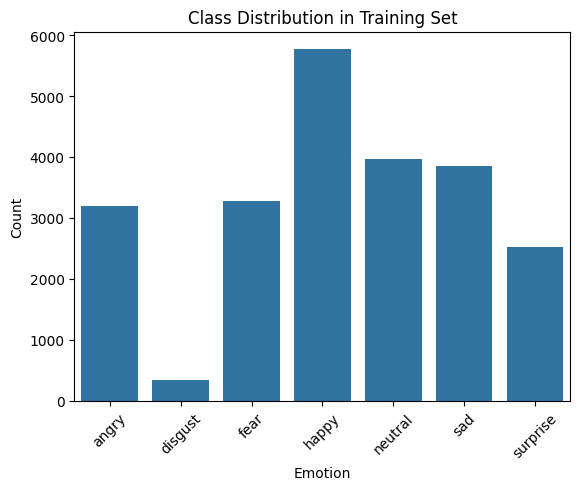

In [16]:
# Check if there is class imbalance
# Get class labels from traingen (not just a batch but all)
labels = traingen.classes
class_indices = traingen.class_indices
class_labels = {v: k for k, v in class_indices.items()}

label_names = [class_labels[label] for label in labels]
sns.countplot(x=label_names, order=sorted(set(label_names)))
plt.title("Class Distribution in Training Set")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<div style="margin-top: -10px; font-size: 75%; text-align: left;">
Figure 2. XXXXX

In [ ]:
# Add added data augmentation to train dataset to improve robustness
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

# keep the rescale only for validation & test data
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [18]:
# Update the generator
traingen = train_datagen.flow_from_directory(
    DATA_DIR + "/train",
    target_size=target_size,
    batch_size=batch_size,
    class_mode="sparse",
    color_mode="grayscale",
)

valgen = val_test_datagen.flow_from_directory(
    DATA_DIR + "/validation",
    target_size=target_size,
    batch_size=batch_size,
    class_mode="sparse",
    color_mode="grayscale",
)

testgen = val_test_datagen.flow_from_directory(
    DATA_DIR + "/test",
    target_size=target_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode="sparse",
    color_mode="grayscale",
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [19]:
# Add class weight

labels = traingen.classes
class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(labels), y=labels
)
class_weights_dict = dict(enumerate(class_weights))


# We could use this class_weight when we fit the model
pprint(class_weights_dict)

{0: np.float64(1.0266404434114071),
 1: np.float64(9.401555464592715),
 2: np.float64(1.0009587727708533),
 3: np.float64(0.5684585684585685),
 4: np.float64(0.826068191627104),
 5: np.float64(0.8491570541259982),
 6: np.float64(1.2933160650937552)}


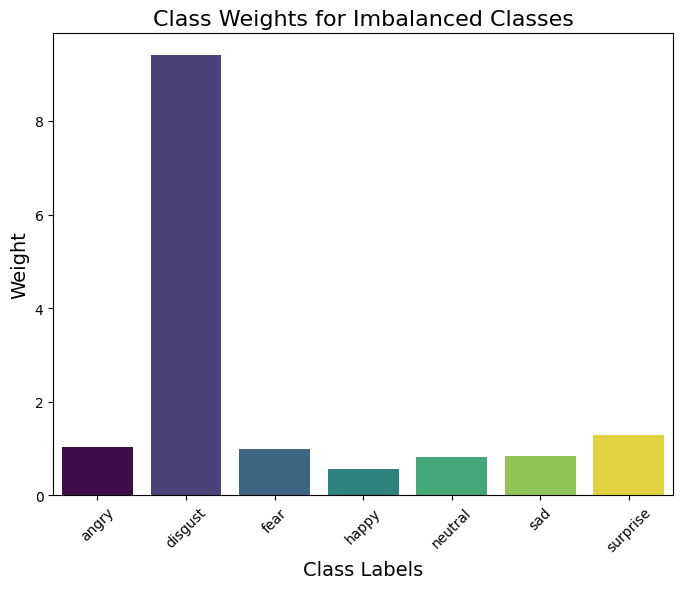

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

labels, values = list(class_weights_dict.keys()), list(class_weights_dict.values())
sns.barplot(x=labels, y=values, hue=labels, palette="viridis")
ax.legend_.remove()
ax.set_xticks(labels, labels=class_labels.values(), rotation=45)

ax.set_title("Class Weights for Imbalanced Classes", fontsize=16)
ax.set_ylabel("Weight", fontsize=14)
ax.set_xlabel("Class Labels", fontsize=14)
plt.show()

<div style="margin-top: -10px; font-size: 75%; text-align: left;">
Figure 3. XXXXX

<div style="margin-top: -10px; font-size: 95%; text-align: left;">
As expected, the class weights are inversely proportional to the number of samples in each class. The class weight for disgust is the largest, while the weight for happy is the smallest.

#### 2.3.3 Denoising (Artifact Inspection)

<div style="margin-top: -10px; font-size: 95%; text-align: left;">

<u>**Non-Local Means Denoising**</u>

Non-local means (NLM) is a denoising technique that differs from local filters by considering the entire image for noise reduction. It does so by computing a mean for all pixels in the image, weighted by how similar these pixels are to the target pixel. We attempt to apply this technique to alleviate the watermark issue seen in some of the images. We use the OpenCV library, which can be easily integrated into TensorFlow via a custom layer. We hand-pick a set of four images to test this denoising approach. A thorough formulation of this method can be found in the Appendix.

Watermarks are typically horizontal and can appear at the top, bottom, or center of the image. Their color may be light or dark, and in some cases, they overlap with facial features.

In [21]:
# Sample of images with watermarks
watermarked_images = [
    "fear/Training_7118915.jpg",
    "happy/Training_10229138.jpg",
    "neutral/Training_15579995.jpg",
    "sad/Training_20437400.jpg",
]

In [ ]:
def read_image(path):
    watermark_img_bytes = tf.io.read_file(path)
    watermark_image_tensor = tf.image.decode_image(watermark_img_bytes, channels=3)

    return watermark_image_tensor

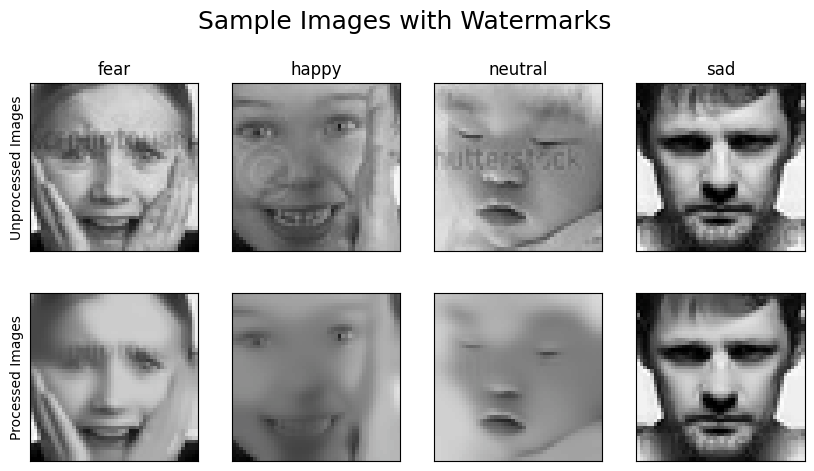

In [23]:
fig, axs = plt.subplots(2, 4, figsize=(10, 5))

counter = 0

for image_path in watermarked_images:
    image = read_image("./data/train/" + image_path)
    axs[0, counter].imshow(image, cmap="gray")
    axs[0, counter].set_title(image_path.split("/")[0])

    denoised_image = cv2.fastNlMeansDenoisingColored(
        image.numpy(),
        None,
        # Strength of the filter
        h=10,
        # Size in pixels of the template patch that is used to compute weights.
        templateWindowSize=7,
        # Size in pixels of the window that is used to compute weighted average for given pixel
        searchWindowSize=21,
    )
    axs[1, counter].imshow(denoised_image, cmap="gray")

    if counter == 0:
        axs[0, 0].set_ylabel("Unprocessed Images")
        axs[1, 0].set_ylabel("Processed Images")

    axs[0, counter].set_xticks([])
    axs[0, counter].set_yticks([])
    axs[1, counter].set_xticks([])
    axs[1, counter].set_yticks([])

    counter += 1

plt.suptitle("Sample Images with Watermarks", y=1.02, fontsize=18)
plt.show()

<div style="margin-top: -10px; font-size: 75%; text-align: left;">
Figure 4. XXXXX

In [24]:
# check the impact of mask on a image without watermark
non_watermarked_image = read_image(
    os.path.join(DATA_DIR, "train", "surprise", "Training_737165.jpg")
)

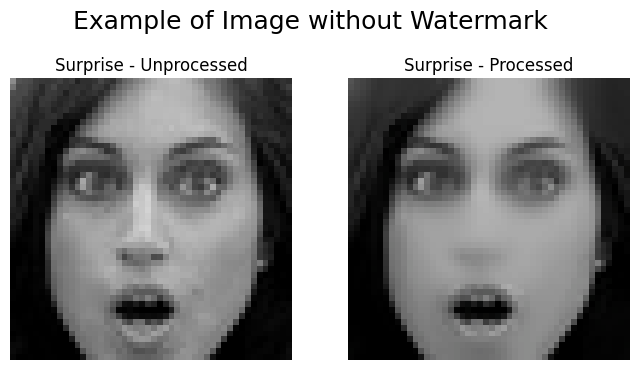

In [25]:
non_watermarked_image_processed = cv2.fastNlMeansDenoisingColored(
    non_watermarked_image.numpy(),
    None,
    # Strength of the filter
    h=12,
    # Size in pixels of the template patch that is used to compute weights.
    templateWindowSize=7,
    # Size in pixels of the window that is used to compute weighted average for given pixel
    searchWindowSize=21,
)


fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(non_watermarked_image, cmap="gray")
ax[0].set_title("Surprise - Unprocessed")
ax[0].axis("off")

ax[1].imshow(non_watermarked_image_processed, cmap="gray")
ax[1].set_title("Surprise - Processed")
ax[1].axis("off")

plt.suptitle("Example of Image without Watermark", y=1.02, fontsize=18)
plt.show()

<div style="margin-top: -10px; font-size: 75%; text-align: left;">
Figure 5. XXXXX

<div style="margin-top: -10px; font-size: 95%; text-align: left;">

The results are decent, but as expected, there is a tradeoff. Since facial skin tones tend to be consistent, the method performed well on the first image. However, we observed a loss of detail when applying NLM; it overly smoothed facial features, such as blurring the eyes, as seen in the second and third images. While the watermark becomes less visible, the overall image clarity is also reduced. In the fourth case, the watermark remains partially visible. We conclude the section with an example of an image without a watermark, and as shown, even this image loses detail after denoising.

We also experimented with other strategies, such as Gaussian denoising, but the results were less effective. The image lost important details without successfully removing the watermark, so this approach was ultimately excluded from the notebook.

It remains to be seen whether the watermark significantly impacts model performance. Since watermarks vary and affect only a small portion of the dataset, our current strategy is to rely on data augmentation to improve generalization and reduce overfitting.

#### 2.3.4 Detecting Outliers

For the final part of our Data Analysis section, we perform outlier detection using a simple autoencoder. The idea is that an autoencoder will reconstruct non-outlying images well, while it will fail to reconstruct outlying images. We use the reconstruction error, namely MSE, to identify outliers.

Reconstruction error is defined as
$$
\text{Reconstruction Error} = \frac{1}{n} \sum_{i=1}^{n} ||x_i - \hat{x}_i||^2_2
$$
where $x_i$ is a pixel from the original image, $\hat{x}_i$ is the corresponding pixel from the reconstructed image, and $n$ is the total number of pixels in the image.

Lastly, we utilize data generators to load the data in batches, which prevent out of memory errors.

In [26]:
# Add data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [27]:
# Training generator (no labels, just images)
traingen = train_datagen.flow_from_directory(
    DATA_DIR + "/train",
    target_size=target_size,
    batch_size=batch_size,
    class_mode="input",
    color_mode="grayscale",
)

# Validation generator
valgen = val_test_datagen.flow_from_directory(
    DATA_DIR + "/validation",
    target_size=target_size,
    batch_size=batch_size,
    class_mode="input",
    color_mode="grayscale",
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [28]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=3,
    verbose=1,
    mode="min",
    restore_best_weights=True,
)

In [29]:
autoencoder = Sequential(
    [
        Input(shape=(48, 48, 1)),
        Conv2D(32, (3, 3), activation="relu", padding="same"),
        BatchNormalization(),
        MaxPooling2D((2, 2), padding="same"),
        Conv2D(64, (3, 3), activation="relu", padding="same"),
        BatchNormalization(),
        MaxPooling2D((2, 2), padding="same"),
        Conv2D(32, (3, 3), activation="relu", padding="same"),
        BatchNormalization(),
        UpSampling2D((2, 2)),
        Conv2D(64, (3, 3), activation="relu", padding="same"),
        BatchNormalization(),
        UpSampling2D((2, 2)),
        Conv2D(32, (3, 3), activation="relu", padding="same"),
        BatchNormalization(),
        Conv2D(1, (3, 3), activation="sigmoid", padding="same"),
    ]
)

autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,425 (294.63 KB)

 Trainable params: 74,977 (292.88 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
os.makedirs("models", exist_ok=True)
os.makedirs("model_history", exist_ok=True)

if os.path.exists("models/autoencoder.weights.h5"):
    print("Loading pre-trained model weights.")
    autoencoder.load_weights("models/autoencoder.weights.h5")
    with open("model_history/autoencoder_history.pkl", "rb") as f:
        autoencoder_history = pickle.load(f)
else:
    print("No pre-trained model found. Training from scratch.")
    autoencoder_history = autoencoder.fit(
        traingen,
        validation_data=valgen,
        epochs=10,
        callbacks=[early_stopping],
        steps_per_epoch=len(traingen),
        validation_steps=len(valgen),
        verbose=1,
    )
    autoencoder.save_weights("models/autoencoder.weights.h5")
    with open("model_history/autoencoder_history.pkl", "wb") as f:
        pickle.dump(autoencoder_history.history, f)

Loading pre-trained model weights.


In [31]:
# Run inference
reconstruction_errors = []
for i in tqdm(range(len(traingen))):
    batch, labels = next(traingen)
    preds = autoencoder.predict(batch, verbose=0)
    errors = np.mean((batch - preds) ** 2, axis=(1, 2, 3))
    reconstruction_errors.extend(errors)

100%|██████████| 718/718 [03:42<00:00,  3.22it/s]


In [32]:
threshold = np.percentile(reconstruction_errors, 98)
outlier_indices = np.where(reconstruction_errors > threshold)[0].tolist()

outlier_indices = sorted(
    outlier_indices, key=lambda x: reconstruction_errors[x], reverse=True
)

# Setting up threshold to 98% (initially, started off with 95th percentile, but increased to 98th percentile)
print("Reconstrution error MSE threshold: {:.4f}".format(threshold))

num_outliers = len(outlier_indices)
print("Number of outliers detected:", num_outliers)
print("Outlier indices sample:", outlier_indices[:10])

clean_size = traingen.n - num_outliers
print("Clean size of training set:", clean_size)

Reconstrution error MSE threshold: 0.0012
Number of outliers detected: 460
Outlier indices sample: [20795, 20341, 20484, 21854, 5863, 21726, 3972, 15948, 15382, 20161]
Clean size of training set: 22508


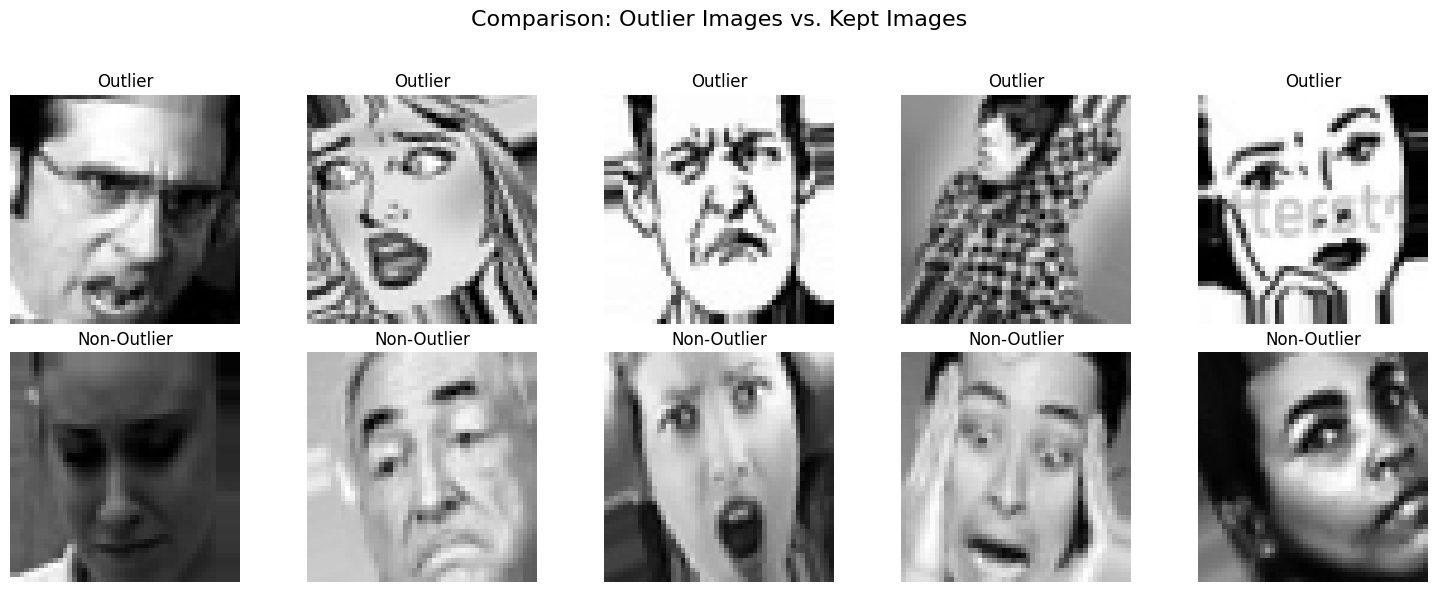

In [33]:
num_examples = 5

visualize_outliers(num_examples, traingen, batch_size, outlier_indices)

In [34]:
output_clean_train(DATA_DIR, traingen, outlier_indices)

100%|██████████| 22968/22968 [01:51<00:00, 205.39it/s]

Copied 22508 non-outlier images to c:\Users\gkim5\OneDrive\Documents\GitHub\cs109b-final-project\data\clean_train


### Data Analysis Summary

- No Missing Data: As verified earlier, the training, validation and test sets contain no missing pixels.


- Class Imbalance: The class "disgust" seems to be underrepresented (~300 samples), while "happy" is overrepresented (~5800 samples). This imbalance was addressed through data augmentation and class weights.


- Watermarks: A small subset of images contains watermarks. Denoising attempts (e.g., NLM) remove watermarks but blur critical facial features, possibly degrading model performance. Alternative denoising (e.g., Gaussian) didn’t seem to improve results tremendously.


- Outliers: After training an autoencoder, we were able to successfully identify outliers based on reconstruction error. We chose the 98th percentile as our threshold for identifying outliers. The model flagged a total of 460 images, by design this is 2% of the training set. These images include watermarked or otherwise anomalous samples that deviate from the majority of the facial expressions. By removing them, we reduced our training set to 22,508 images. The sample of outliers show images that are stretched, have sunglasses or are drawn images.



### Meaningful Insights

Based on our data analysis, we have several meaningful insights that can be used to support our goal of developing a deep learning model capable of accurately classifying human facial expressions.


1. Class imbalance: We observed significant class imbalance in the dataset, especially with the disgust category, which had far fewer training examples compared to other classes like happy or neutral. Imbalanced training data can lead to poor generalization and biased prediction. Therefore, we will apply class weighting during training or perform targeted data augmentation to improve the model's ability to learn from underrepresented emotions.

2. Denoising: We found that denoising smoothed the input images while preserving important facial structures. Denoised inputs help the model focus on relevant facial features instead of noisy pixels. Therefore, we will apply a denoising step in the preprocessing pipeline before training for more complex models.

3. Outlier detection: Our autoencoder was successfully able to filter outliers. We set a threshold to remove ~2% of the training data as noisy or uninformative. Many of these images had occlusions (e.g. hands), extreme facial poses, were drawn images or had low contrast. Removing outliers helps model generalization. We will exclude these outliers from training to reduce overfitting and enhance class specific feature clarity.



## Research Question

Now that we've established an exhaustive EDA, we present the research questions that will guide our empirical analysis. 

1. What is the best custom model architecture for classifying human facial expressions and how well does it perform compared to existing models in the literature?$^{[3]}$

2. How does the model perform for each emotion class? What are the implications of the results?

3. How do vision transformers model compare to CNN models in terms of performance for the FER-2013 dataset?

## Baseline Model

We wanted to run an experiment to compare two scaling methods 1) standard scaling and 2) min-max scaling and use the baseline model performance to make a decision.

As seen in the following section, even though the `per_image_standardization` yields slightly better results, the training time increased, which is why we decided to move forward with the min-max scaling. Being able to quickly iterate over new architectures is more beneficial.

For our baseline model, we will only normalize the pixel values of our training and validation set (more details in the next section).

In [35]:
baseline_train_datagen = image_dataset_from_directory(
    DATA_DIR + "/clean_train",
    image_size=target_size,
    batch_size=batch_size,
    label_mode="categorical",
    color_mode="grayscale",
)

baseline_val_datagen = image_dataset_from_directory(
    val_dir,
    image_size=target_size,
    batch_size=batch_size,
    label_mode="categorical",
    color_mode="grayscale",
)


def minmax_norm(x, y):
    return x / 255.0, y


train_norm = baseline_train_datagen.map(
    minmax_norm, num_parallel_calls=tf.data.AUTOTUNE
).prefetch(buffer_size=tf.data.AUTOTUNE)

val_norm = baseline_val_datagen.map(
    minmax_norm, num_parallel_calls=tf.data.AUTOTUNE
).prefetch(buffer_size=tf.data.AUTOTUNE)

Found 22508 files belonging to 7 classes.
Found 5741 files belonging to 7 classes.


In [36]:
# test if GPU is available
if tf.config.list_physical_devices("GPU"):
    print("GPU available")
else:
    print("No GPU available")

# set seeds for reproducibility
os.environ["PYTHONHASHSEED"] = "0"
os.environ["CUDA_VISIBLE_DEVICES"] = ""
tf.random.set_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
set_random_seed(RANDOM_SEED)


# plot accuracy
def plot_accuracy(history, plot_title="Model"):
    """
    Helper function to plot accuracy of a model.
    """

    plt.figure(figsize=(12, 6))

    best_val_acc = np.max(history.history["val_accuracy"])
    best_epoch = np.argmax(history.history["val_accuracy"])

    epochs = range(1, len(history.history["accuracy"]) + 1)

    plt.plot(epochs, history.history["accuracy"], label="Training Accuracy")
    plt.plot(epochs, history.history["val_accuracy"], label="Validation Accuracy")

    plt.axvline(
        best_epoch + 1,
        color="red",
        linestyle="--",
        label=f"Best val acc: {best_val_acc:.4f}",
    )

    plt.title(f"{plot_title}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.xticks(epochs)
    plt.legend(loc="lower right")

No GPU available


The baseline model will follow a very basic model architecture taken from the Lab's code. We added one regularization layer and adjusted the output layer. The loss function was adjusted as well to account for the classes in our data.

In [ ]:
# very basic model
def create_baseline_model(show_summary=False):
    inputs = Input(shape=(48, 48, 1))

    x = Conv2D(64, kernel_size=(3, 3), activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(16, kernel_size=(3, 3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.5)(x)
    outputs = Dense(7, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    if show_summary:
        model.summary()

    return model

In [38]:
baseline_model = create_baseline_model(show_summary=True)

baseline_model_history = baseline_model.fit(
    train_norm, validation_data=val_norm, epochs=15, verbose=1
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,527 (224.71 KB)

 Trainable params: 57,527 (224.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 118s 162ms/step - accuracy: 0.2348 - loss: 1.8329 - val_accuracy: 0.3529 - val_loss: 1.6532
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.3461 - loss: 1.6579 - val_accuracy: 0.4119 - val_loss: 1.5508
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.3944 - loss: 1.5387 - val_accuracy: 0.4449 - val_loss: 1.4624
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.4250 - loss: 1.4727 - val_accuracy: 0.4633 - val_loss: 1.4269
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.4501 - loss: 1.4235 - val_accuracy: 0.4762 - val_loss: 1.3817
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.4707 - loss: 1.3802 - val_accuracy: 0.4841 - val_loss: 1.3475
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.4767 - loss: 1.3581 - val_accuracy: 0.4882 - val_loss: 1.3615
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.4857 - loss: 1.3319 

Baseline Model with Pixel Normalization
Train Loss: 77.5467, Train Accuracy: 0.3824
Validation Loss: 87.5689, Validation Accuracy: 0.3604


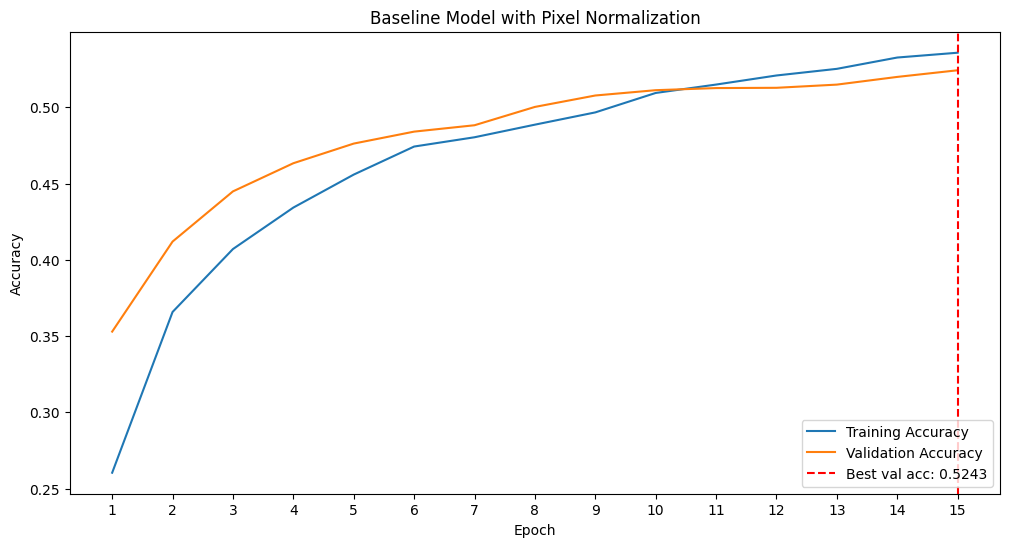

In [39]:
train_loss, train_acc = baseline_model.evaluate(baseline_train_datagen, verbose=0)
val_loss, val_acc = baseline_model.evaluate(baseline_val_datagen, verbose=0)

print("Baseline Model with Pixel Normalization")
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

plot_accuracy(baseline_model_history, "Baseline Model with Pixel Normalization")

With just these results, it is hard to tell how our model is performing. The baseline should at least inform us that: 1) our model and the data generators are working, and 2) without any preprocessing, we get a validation accuracy of ~52% after 14 epochs. However, the fact that the model is not overfitting the training data (training accuracy starts decreasing after 5 epochs) suggests there can be problems in the model implementation. Lucky for us, this is just the baseline, a rough gauge of where we're starting.

### Feature Scaling


What if we trained the same model only with a slightly different preprocessing: per image standardization, instead of just dividing pixel values by 255.



In [40]:
@apply_to_image
def standardize_image(image, eps=1e-6):

    image = tf.cast(image, tf.float32)
    mean = tf.reduce_mean(image)
    std = tf.math.reduce_std(image)
    n = tf.cast(tf.size(image), tf.float32)

    adjusted_std = tf.maximum(std, 1.0 / tf.sqrt(n + eps))
    standardized = (image - mean) / adjusted_std

    return standardized

NameError: name 'apply_to_image' is not defined

In [ ]:
train_std_datagen = image_dataset_from_directory(
    DATA_DIR + "/clean_train",
    image_size=target_size,
    batch_size=batch_size,
    label_mode="categorical",
    color_mode="grayscale",
)

val_std_datagen = image_dataset_from_directory(
    val_dir,
    image_size=target_size,
    batch_size=batch_size,
    label_mode="categorical",
    color_mode="grayscale",
)

train_std = train_std_datagen.map(standardize_image)
val_std = val_std_datagen.map(standardize_image)

Found 22962 files belonging to 7 classes.
Found 5741 files belonging to 7 classes.


In [ ]:
baseline_std_model = create_baseline_model()

baseline_std_model_history = baseline_std_model.fit(
    train_std, epochs=15, validation_data=val_std, verbose=1
)

Epoch 1/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2825 - loss: 1.7615 - val_accuracy: 0.4233 - val_loss: 1.4956
Epoch 2/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4175 - loss: 1.5011 - val_accuracy: 0.4602 - val_loss: 1.4130
Epoch 3/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4640 - loss: 1.3954 - val_accuracy: 0.4902 - val_loss: 1.3364
Epoch 4/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5017 - loss: 1.3180 - val_accuracy: 0.5043 - val_loss: 1.2940
Epoch 5/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5109 - loss: 1.2758 - val_accuracy: 0.5090 - val_loss: 1.2801
Epoch 6/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5264 - loss: 1.2392 - val_accuracy: 0.5187 - val_loss: 1.2674
Epoch 7/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5349 - loss: 1.2085 - val_accuracy: 0.5236 - val_loss: 1.2508
Epoch 8/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5498 - loss: 1.1781 - val_accuracy: 0.

Baseline Model with Per Image Standardization
Train Loss: 36.5943, Train Accuracy: 0.3932
Validation Loss: 42.5998, Validation Accuracy: 0.3634


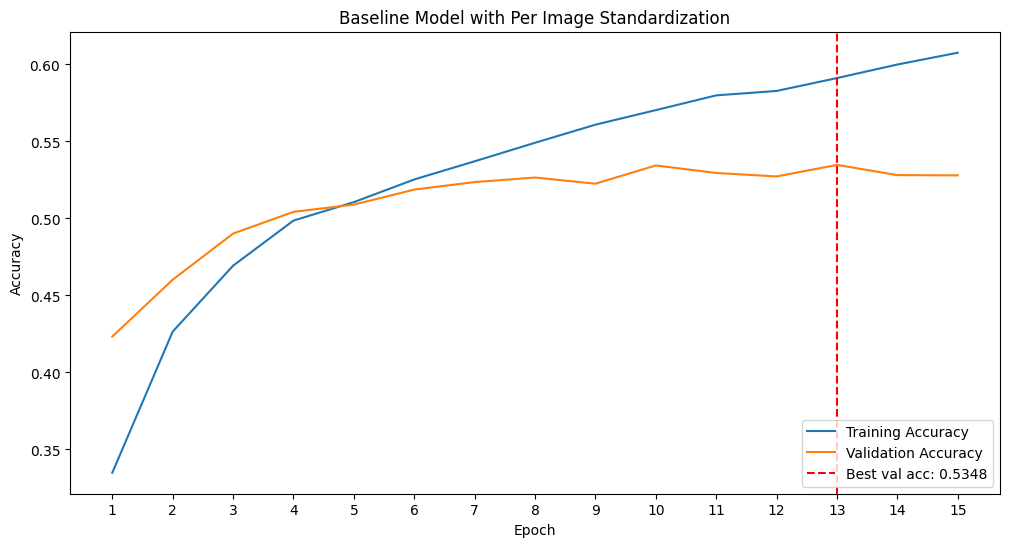

In [ ]:
train_loss, train_acc = baseline_std_model.evaluate(train_std_datagen, verbose=0)
val_loss, val_acc = baseline_std_model.evaluate(val_std_datagen, verbose=0)

print("Baseline Model with Per Image Standardization")
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

plot_accuracy(
    baseline_std_model_history, "Baseline Model with Per Image Standardization"
)

Even though the best reported validation accuracy improved compared to the previous model, the training time increased significantly (as the data flow is now performing more complex calculations on each image). For future steps, we can find ways to optimize this step, if it is going to significantly improve performance. Preliminary results, however, indicate the tradeoff may not be worth it.

### Data Augmentation

In [ ]:
train_aug = image_dataset_from_directory(
    train_dir,
    image_size=target_size,
    batch_size=batch_size,
    label_mode="categorical",
    color_mode="grayscale",
)

val_aug = val_norm

# augmentation pipeline
data_augmentation = tf.keras.Sequential(
    [
        Rescaling(1.0 / 255),
        RandomRotation(0.083),
        RandomTranslation(0.1, 0.1),
        RandomZoom(0.2),
        RandomFlip("horizontal"),
    ]
)


def augment_pair(x, y):
    return data_augmentation(x, training=True), y


train_aug = train_aug.map(augment_pair, num_parallel_calls=tf.data.AUTOTUNE).prefetch(
    buffer_size=tf.data.AUTOTUNE
)
val_aug = val_aug.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 22968 files belonging to 7 classes.


In [ ]:
baseline_aug_model = create_baseline_model()
baseline_aug_model_history = baseline_aug_model.fit(
    train_aug,
    epochs=15,
    validation_data=val_aug,
    steps_per_epoch=len(train_aug),
    verbose=1,
)

Epoch 1/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2412 - loss: 1.8319 - val_accuracy: 0.2529 - val_loss: 1.7810
Epoch 2/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2616 - loss: 1.7737 - val_accuracy: 0.3015 - val_loss: 1.7040
Epoch 3/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2815 - loss: 1.7384 - val_accuracy: 0.3294 - val_loss: 1.6780
Epoch 4/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2911 - loss: 1.7218 - val_accuracy: 0.3372 - val_loss: 1.6472
Epoch 5/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3149 - loss: 1.6944 - val_accuracy: 0.3783 - val_loss: 1.5939
Epoch 6/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3242 - loss: 1.6741 - val_accuracy: 0.4011 - val_loss: 1.5434
Epoch 7/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3444 - loss: 1.6523 - val_accuracy: 0.4172 - val_loss: 1.4940
Epoch 8/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3517 - loss: 1.6294 - val_accuracy: 0.

Baseline Model with Data Augmentation
Train Loss: 98.1870, Train Accuracy: 0.2515
Validation Loss: 96.9260, Validation Accuracy: 0.2442


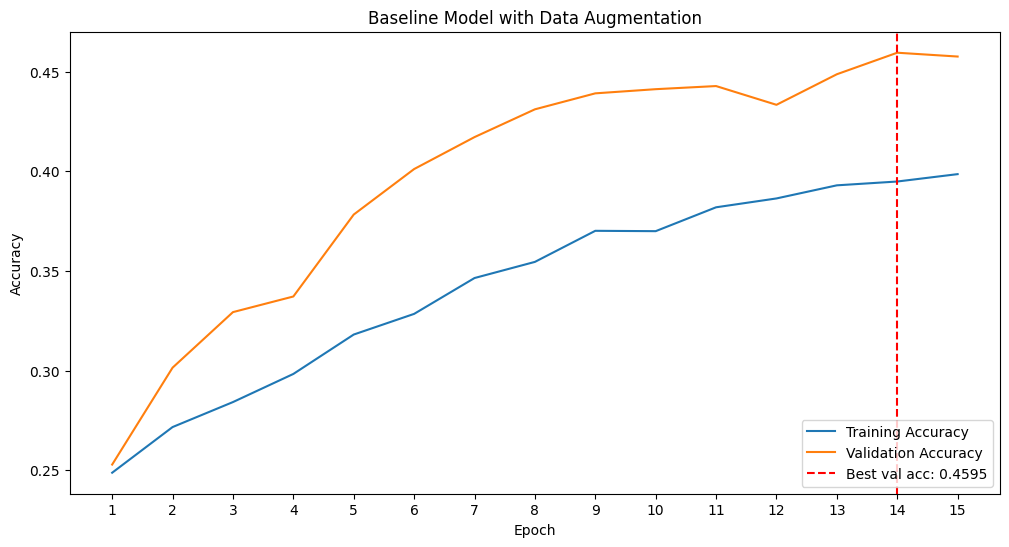

In [ ]:
train_loss, train_acc = baseline_aug_model.evaluate(baseline_train_datagen, verbose=0)
val_loss, val_acc = baseline_aug_model.evaluate(baseline_val_datagen, verbose=0)

print("Baseline Model with Data Augmentation")
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

plot_accuracy(baseline_aug_model_history, "Baseline Model with Data Augmentation")

The results are comparable to the baseline model without data augmentation, and may have to do with the extremely simple architecture of the baseline model, rather than the data augmentation process itself. We are being limited by the (lack of) complexity of the baseline model, which is why we will go with a more complex model.

## Improved Baseline: UNet

*Sidenote: we finetuned both a ResNet50 and a VGG16 model, but the results weren't promising. These models are too complex for our task, and neither outperformed the baseline, at least for this stage. For this reason we decided to build our own architecture, following the literature on facial recognition.*



We decided to try U-Net because it offers a simple balance of complexity and performance for emotion recognition, combining multi-scale feature integration with natural attention mechanisms through its skip connections. The encoder-decoder structure captures facial features at different resolutions while keeping the model lighter than VGG16 but more sophisticated than our baseline CNN, making it well-suited for the FER2013 dataset size.

In [ ]:
def create_unet_model():
    # input layer - 48x48 grayscale
    inputs = Input(shape=(48, 48, 1))

    # --- encoder path ---

    # first block - level 1
    x1 = Conv2D(64, kernel_size=(3, 3), padding="same", kernel_regularizer=l2(1e-4))(
        inputs
    )
    x1 = BatchNormalization()(x1)
    x1 = Activation("relu")(x1)
    x1 = Conv2D(64, kernel_size=(3, 3), padding="same", kernel_regularizer=l2(1e-4))(x1)
    x1 = BatchNormalization()(x1)
    x1 = Activation("relu")(x1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(x1)
    pool1 = SpatialDropout2D(0.1)(pool1)

    # second block - level 2
    x2 = Conv2D(128, kernel_size=(3, 3), padding="same", kernel_regularizer=l2(1e-4))(
        pool1
    )
    x2 = BatchNormalization()(x2)
    x2 = Activation("relu")(x2)
    x2 = Conv2D(128, kernel_size=(3, 3), padding="same", kernel_regularizer=l2(1e-4))(
        x2
    )
    x2 = BatchNormalization()(x2)
    x2 = Activation("relu")(x2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(x2)
    pool2 = SpatialDropout2D(0.2)(pool2)

    # third block - bottleneck
    x3 = Conv2D(256, kernel_size=(3, 3), padding="same", kernel_regularizer=l2(1e-4))(
        pool2
    )
    x3 = BatchNormalization()(x3)
    x3 = Activation("relu")(x3)
    x3 = Conv2D(256, kernel_size=(3, 3), padding="same", kernel_regularizer=l2(1e-4))(
        x3
    )
    x3 = BatchNormalization()(x3)
    x3 = Activation("relu")(x3)

    # --- decoder path with attention ---

    # level 2 upsampling
    up2 = UpSampling2D(size=(2, 2))(x3)
    up2 = Conv2D(128, kernel_size=(3, 3), padding="same", kernel_regularizer=l2(1e-4))(
        up2
    )
    up2 = BatchNormalization()(up2)
    up2 = Activation("relu")(up2)

    # attention for level 2
    attn2 = Conv2D(128, kernel_size=(1, 1), padding="same")(x2)
    attn2 = BatchNormalization()(attn2)
    attn2 = Activation("sigmoid")(attn2)
    attended_x2 = Multiply()([x2, attn2])

    # combine features
    merge2 = Concatenate()([up2, attended_x2])
    merge2 = Conv2D(
        128, kernel_size=(3, 3), padding="same", kernel_regularizer=l2(1e-4)
    )(merge2)
    merge2 = BatchNormalization()(merge2)
    merge2 = Activation("relu")(merge2)

    # level 1 upsampling
    up1 = UpSampling2D(size=(2, 2))(merge2)
    up1 = Conv2D(64, kernel_size=(3, 3), padding="same", kernel_regularizer=l2(1e-4))(
        up1
    )
    up1 = BatchNormalization()(up1)
    up1 = Activation("relu")(up1)

    # attention for level 1
    attn1 = Conv2D(64, kernel_size=(1, 1), padding="same")(x1)
    attn1 = BatchNormalization()(attn1)
    attn1 = Activation("sigmoid")(attn1)
    attended_x1 = Multiply()([x1, attn1])

    # combine features
    merge1 = Concatenate()([up1, attended_x1])
    merge1 = Conv2D(
        64, kernel_size=(3, 3), padding="same", kernel_regularizer=l2(1e-4)
    )(merge1)
    merge1 = BatchNormalization()(merge1)
    merge1 = Activation("relu")(merge1)

    # --- feature extraction ---

    # multi-level features
    feat_lvl3 = GlobalAveragePooling2D()(x3)
    feat_lvl2 = GlobalAveragePooling2D()(merge2)
    feat_lvl1 = GlobalAveragePooling2D()(merge1)
    combined_features = Concatenate()([feat_lvl1, feat_lvl2, feat_lvl3])

    # classification head
    x = Dense(256, kernel_regularizer=l2(1e-4))(combined_features)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.5)(x)

    # output for 7 emotions
    outputs = Dense(7, activation="softmax")(x)

    # create model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model


# training takes a lot to train, beware!
if not os.path.exists("models/unet_attention_fer_model.keras"):

    unet_model = create_unet_model()

    callbacks = [
        EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-5),
        ModelCheckpoint(
            "models/unet_attention_fer_model.keras",
            monitor="val_accuracy",
            save_best_only=True,
        ),
    ]

    unet_history = unet_model.fit(
        train_norm,
        validation_data=val_norm,
        epochs=50,
        batch_size=64,
        callbacks=callbacks,
    )
    with open("model_history/unet_history.pkl", "wb") as f:
        pickle.dump(unet_history, f)
else:
    print("Model file already exists. Skipping training.")
    # Load the existing model if needed
    unet_model = tf.keras.models.load_model("models/unet_attention_fer_model.keras")

    with open("model_history/unet_history.pkl", "rb") as f:
        unet_history = pickle.load(f)

Epoch 1/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.2056 - loss: 2.2453 - val_accuracy: 0.2195 - val_loss: 1.9624 - learning_rate: 0.0010
Epoch 2/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2436 - loss: 1.9791 - val_accuracy: 0.2752 - val_loss: 1.8591 - learning_rate: 0.0010
Epoch 3/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2776 - loss: 1.8666 - val_accuracy: 0.2886 - val_loss: 1.8677 - learning_rate: 0.0010
Epoch 4/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3882 - loss: 1.6673 - val_accuracy: 0.4182 - val_loss: 1.6784 - learning_rate: 0.0010
Epoch 5/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4549 - loss: 1.5231 - val_accuracy: 0.4062 - val_loss: 1.7410 - learning_rate: 0.0010
Epoch 6/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4958 - loss: 1.4454 - val_accuracy: 0.4630 - val_loss: 1.5783 - learning_rate: 0.0010
Epoch 7/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5190 - loss: 1.4018 

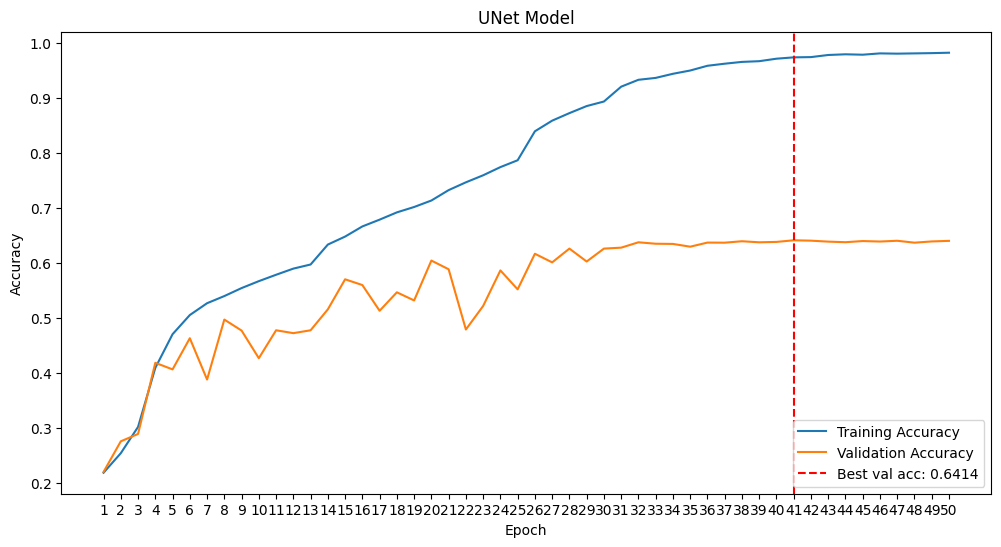

In [ ]:
plot_accuracy(unet_history, "UNet Model")

There is definitely an improvement over our baseline model! This will be our baseline model moving forward, as we're certain that there's still room for improvement.

### Modeling Summary


In the above experiment, we implemented two methods, rescaling, dividing pixel values by 255 to normalize data within the [0,1] range and per-image standardization to normalize each image individually, addressing variations in lighting and contrast. Even though the performance improved with per_image_standardization, it wasn't significant enough to justify the added complexity and training time, which is why we moved forward with a different approach: build a more complex architecture, and train it with augmented data.


Our U-Net architecture significantly improved performance over the baseline CNN, achieving 64% accuracy compared to 52%. This improvement validates our approach of using a more sophisticated architecture with built-in attention mechanisms through skip connections, which helps the model focus on emotion-relevant facial features. The U-Net successfully balances complexity and efficiency, capturing multi-scale information while remaining computationally reasonable for the dataset size.


For future milestones, we see different promising avenues to further improve model performance. These include experimenting with ensemble methods combining multiple architectures, implementing cross-validation to better handle FER2013's class imbalance, exploring transfer learning with facial recognition pre-trained models, and investigating more advanced attention mechanisms like transformers. We could also benefit from hyperparameter tuning.

## Visualizations

All visualizations above are clean, labeled, and designed to communicate insights clearly and effectively. Each plot includes appropriate titles, axis labels, and legends to ensure they are presentation- and report-ready. Below, we’ve included a series of additional visualizations that go beyond traditional EDA to assess and interpret the behavior of our trained baseline models. These visualizations help us better understand how the models make decisions, what features they rely on, and where they focus their attention. 

### GradCAM

To better understand how our models make predictions, we used GradCAM to generate class activation heatmaps for both the baseline_model and the baseline_std_model. These visualizations show us which regions of the image the model is attending to when making its classification decision.

Key Findings:

1. Baseline Model: The GradCAM visualizations for this model were often less focused and more diffuse, sometimes highlighting background regions or unrelated areas of the face. This suggests that the baseline model did not have learned strong, localized features for the task, possibly relying on more general patterns in the image.
2. Baseline Model with Per Image Standardization: The GradCAM outputs for this model were more concentrated around the core facial features - particularly the head, nose, and mouth. This tighter focus implies that the model has learned to attend to more relevant and discriminative regions, which aligns with its improved performance metrics.

Found 22962 images belonging to 7 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


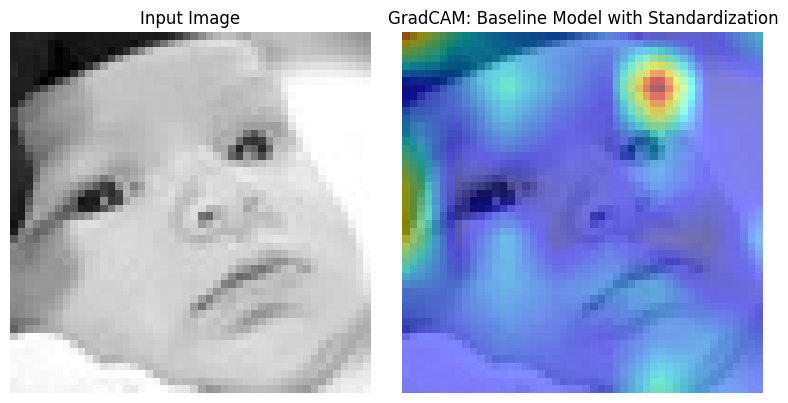

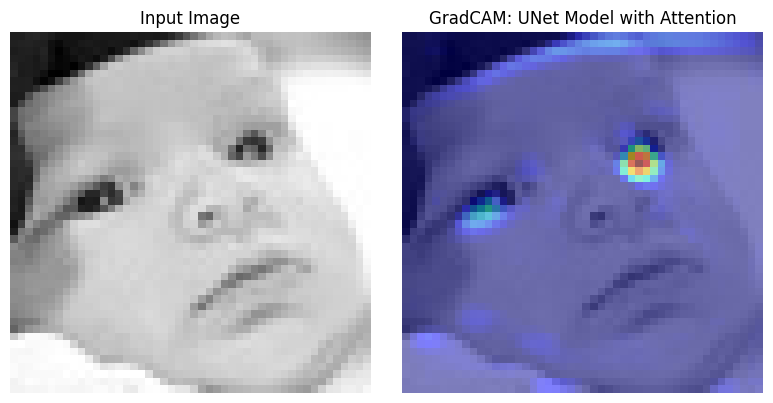

In [ ]:
replace2linear = ReplaceToLinear()


def generate_gradcam(model, img, class_index):
    gradcam = Gradcam(model, model_modifier=replace2linear, clone=True)
    score = CategoricalScore([class_index])
    # This is equivalent to the above use of CategoricalScore
    # score = lambda outputs: outputs[:, class_index]
    gradcam_results = gradcam(score, img)
    return gradcam_results


def show_gradcam(model, img_array, true_class_idx, title):
    cam_result = generate_gradcam(model, img_array, true_class_idx)

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(img_array[0].squeeze(), cmap="gray")
    ax[0].set_title("Input Image")
    ax[0].axis("off")

    ax[1].imshow(img_array[0].squeeze(), cmap="gray")
    ax[1].imshow(cam_result[0], cmap="jet", alpha=0.5)
    ax[1].set_title(f"GradCAM: {title}")
    ax[1].axis("off")
    plt.tight_layout()
    plt.show()


# We'll pick one image and generate GradCAM for both baseline models!
cleaned_train_gen = val_test_datagen.flow_from_directory(
    DATA_DIR + "/clean_train",
    target_size=(48, 48),
    batch_size=32,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True,
)
sample_batch, labels = next(cleaned_train_gen)
sample_img = sample_batch[0:1]
pred_class = np.argmax(baseline_model.predict(sample_img))

show_gradcam(
    baseline_std_model,
    sample_img,
    pred_class,
    title="Baseline Model with Standardization",
)
show_gradcam(
    unet_model,
    sample_img,
    pred_class,
    title="UNet Model with Attention",
)

## Summary of Findings

In MS3, we as a group were able to accomplish many things. We built an autoencoder model to successfully detect outliers and made it flexible enough to be applied to any dataset, with any arbitrary threshold. We used this outlier detection to filter images in the training set. With filtering, the baseline model with standard scaling showed a slight performance increase (currently at 53% accuracy). Furthermore, we revised our research question to be more ambitious, including vision transformers as a goal, building on the initial project specifications. We also implemented data augmentation on the baseline model to compare different preprocessing techniques. We were able to improve on the baseline with a U-net model, currently at 64% accuracy. Finally, we implemented GradCAM to visualize the model's attention and understand how it makes predictions.

For future work, we hope to build on our momentum and shoot for a model that can predict 75% accuracy. The current SOTA model is able to predict 79.79% accuracy on the test set. We will also try implementing a vision transformer model to see how it compares to CNN architectures. With respect to each of these models, we will try more preprocessing strategies until we land at the optimal preprocessing, model combination.

## Sources

Wikipedia contributors. (2025, January 24). Non-local means. Wikipedia. https://en.wikipedia.org/wiki/Non-local_means

OpenCV: Denoising. (n.d.). https://docs.opencv.org/3.4/d1/d79/group__photo__denoise.html#ga03aa4189fc3e31dafd638d90de335617

Papers with Code - FER2013 Benchmark (Facial Expression Recognition (FER)). (n.d.). https://paperswithcode.com/sota/facial-expression-recognition-on-fer2013

## Appendix

### Mathematical Formulae

#### Non-Local Means Denoising
The NLM algorithm is defined as the following transformation. Let $u(p)$ be the transformed pixel value at position $p$ in the image. $C(p)$ is a normalizing constant and $\Omega$ is the set of pixels in the image. $v(q)$ is the untransformed pixel.

$$
u(p) = \frac{1}{C(p)} \sum_{q \in \Omega} v(q) \cdot w(p,q) dq
$$

The weight function $w(p,q)$ is defined as follows:

$$
w(p,q) = exp(- \frac{|B(q) - B(p)|^2}{h^2}).
$$

$h$ is the parameter we pass into the NLM function. It controls the strength of the denoising. A larger value of $h$ means more smoothing and less detail. $B(p)$ is a patch of pixels around the pixel p. The size of the patch is defined by the parameter `templateWindowSize`. $B(q)$ is a patch of pixels around the pixel q. The size of the patch is defined by the parameter `searchWindowSize`. The weight measures how similar the patches $B(p)$ and $B(q)$ are. The weight will be larger if the patches are more similar.

#### GradCAM

GradCAM is a technique that uses the gradients of the target class with respect to the feature maps of the last convolutional layer to produce a coarse localization map highlighting the important regions in the image for predicting the class. It is preferred over CAM because it is agnostic to the architecture of the model and can be applied to any CNN-based model. The algorithm is as follows:


**Step 1**

Get the gradient of the class score with respect to the feature maps $\frac{\partial y_c}{\partial A_k}$. This measures how a class score changes with respect to a change in the feature map. We denote $k$ as the index for a given feature map.

**Step 2**

We apply global average pooling to the map of gradients

$$
\alpha_k^c = \frac{1}{Z} \sum_i \sum_j \frac{\partial y_c}{\partial A_k^{ij}}
$$

The $\alpha_k^c$ are the weights for each feature map $k$. The indices $i$ and $j$ are the spatial dimensions of the feature map. This measures how an activation in the feature map affects the class score.

**Step 3**

Perform weighted sum of feature maps using these weights

$$
g_c = \sum_k \alpha_k^c A_k
$$


**Step 4**

ReLU the result

$$
g_c^* = ReLU(g_c)
$$

This means we apply the activation function to each pixel in the gradCAM map.

**Step 5**

Upsample the gradCAM map to match the dimensions of the input image.